In [2]:
import nltk
from nltk.corpus import inaugural

import numpy as np 
import pandas as pd 
import re 
import nltk 
import matplotlib.pyplot as plt
import string 
import matplotlib

from nltk.tokenize import sent_tokenize

In [3]:
Nixon = inaugural.raw('1973-Nixon.txt')
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')

# EDA

In [11]:
print(Nixon)

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

In [16]:
def analyze_text(text, title):
    
    word_count = "{:,}".format(len(text.split()))
    
    char_count_with_spaces = "{:,}".format(len(text))
    
    char_count_without_spaces = "{:,}".format(len(text.replace(" ", "")))
    
    sentence_count = "{:,}".format(len(sent_tokenize(text)))

    words = text.split()
    avg_word_length = "{:.2f}".format(sum(len(word) for word in words) / len(words))

    print(f'For {title}:')
    print(f'Word Count - {word_count}')
    print(f'Character Count (incl. spaces) - {char_count_with_spaces}')
    print(f'Character Count (excl. spaces) - {char_count_without_spaces}')
    print(f'Sentence Count - {sentence_count}')
    print(f'Average Word Length - {avg_word_length}')

In [17]:
analyze_text(Nixon, 'Nixon')

For Nixon:
Word Count - 1,819
Character Count (incl. spaces) - 9,991
Character Count (excl. spaces) - 8,223
Sentence Count - 68
Average Word Length - 4.47


In [18]:
analyze_text(Roosevelt, 'Roosevelt')

For Roosevelt:
Word Count - 1,360
Character Count (incl. spaces) - 7,571
Character Count (excl. spaces) - 6,249
Sentence Count - 68
Average Word Length - 4.54


In [19]:
analyze_text(Kennedy, 'Kennedy')

For Kennedy:
Word Count - 1,390
Character Count (incl. spaces) - 7,618
Character Count (excl. spaces) - 6,255
Sentence Count - 52
Average Word Length - 4.46


# Text Cleaning

## Removing Punctuation Marks

In [185]:
def remove_punct(text):
    punct_pattern = r'[^\w\s]'
    return re.sub(punct_pattern, '', text)

In [192]:
Nixon_punct = remove_punct(Nixon)
Kennedy_punct = remove_punct(Kennedy)
Roosevelt_punct = remove_punct(Roosevelt)

In [276]:
print(Nixon_punct)

Mr Vice President Mr Speaker Mr Chief Justice Senator Cook Mrs Eisenhower and my fellow citizens of this great and good country we share together

When we met here four years ago America was bleak in spirit depressed by the prospect of seemingly endless war abroad and of destructive conflict at home

As we meet here today we stand on the threshold of a new era of peace in the world

The central question before us is How shall we use that peace Let us resolve that this era we are about to enter will not be what other postwar periods have so often been a time of retreat and isolation that leads to stagnation at home and invites new danger abroad

Let us resolve that this will be what it can become a time of great responsibilities greatly borne in which we renew the spirit and the promise of America as we enter our third century as a nation

This past year saw farreaching results from our new policies for peace By continuing to revitalize our traditional friendships and by our missions to

## Converting to Lowercase

In [193]:
all_words_Nixon = []
all_words_Kennedy = []
all_words_Roosevelt = []

In [215]:
for word in Nixon_punct.split():
    lower_word = word.lower()
    all_words_Nixon.append(lower_word)

In [216]:
for word in Kennedy_punct.split():
    lower_word = word.lower()
    all_words_Kennedy.append(lower_word)

In [217]:
for word in Roosevelt_punct.split():
    lower_word = word.lower()
    all_words_Roosevelt.append(lower_word)

In [278]:
print(all_words_Nixon)

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', 'when', 'we', 'met', 'here', 'four', 'years', 'ago', 'america', 'was', 'bleak', 'in', 'spirit', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', 'as', 'we', 'meet', 'here', 'today', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', 'the', 'central', 'question', 'before', 'us', 'is', 'how', 'shall', 'we', 'use', 'that', 'peace', 'let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that', 'leads', 'to', 'stagnation', 'at', 'home', 'and', 'invites', 'new', 'dan

## Remove Stopwords

In [176]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stopwords.extend(['mr.','mrs.','--',"'",'.','"',','])

In [219]:
Nixon_clean = []
Kennedy_clean = []
Roosevelt_clean = []

In [223]:
for word in all_words_Nixon:
    if word not in stopwords:
        Nixon_clean.append(word)

In [224]:
for word in all_words_Kennedy:
    if word not in stopwords:
        Kennedy_clean.append(word)

In [225]:
for word in all_words_Roosevelt:
    if word not in stopwords:
        Roosevelt_clean.append(word)

In [280]:
print(Nixon_clean)

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'met', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'world', 'central', 'question', 'us', 'shall', 'use', 'peace', 'let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'let', 'us', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'farreaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions', 'peking', 'moscow', 'able', 'establish', 

## Stemming

In [24]:
from nltk.stem import PorterStemmer

In [229]:
stemmer = PorterStemmer()

In [230]:
Nixon_stem = [stemmer.stem(word) for word in Nixon_clean]

In [231]:
Kennedy_stem = [stemmer.stem(word) for word in Kennedy_clean]

In [232]:
Roosevelt_stem = [stemmer.stem(word) for word in Roosevelt_clean]

In [282]:
print(Nixon_stem)

['mr', 'vice', 'presid', 'mr', 'speaker', 'mr', 'chief', 'justic', 'senat', 'cook', 'mr', 'eisenhow', 'fellow', 'citizen', 'great', 'good', 'countri', 'share', 'togeth', 'met', 'four', 'year', 'ago', 'america', 'bleak', 'spirit', 'depress', 'prospect', 'seemingli', 'endless', 'war', 'abroad', 'destruct', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peac', 'world', 'central', 'question', 'us', 'shall', 'use', 'peac', 'let', 'us', 'resolv', 'era', 'enter', 'postwar', 'period', 'often', 'time', 'retreat', 'isol', 'lead', 'stagnat', 'home', 'invit', 'new', 'danger', 'abroad', 'let', 'us', 'resolv', 'becom', 'time', 'great', 'respons', 'greatli', 'born', 'renew', 'spirit', 'promis', 'america', 'enter', 'third', 'centuri', 'nation', 'past', 'year', 'saw', 'farreach', 'result', 'new', 'polici', 'peac', 'continu', 'revit', 'tradit', 'friendship', 'mission', 'peke', 'moscow', 'abl', 'establish', 'base', 'new', 'durabl', 'pattern', 'relationship', 'among', 'nation', 

## Frequency Distribution

In [233]:
Nixon_freq = nltk.FreqDist(Nixon_stem)

In [285]:
Nixon_freq

FreqDist({'us': 78, 'let': 66, 'america': 63, 'peac': 57, 'world': 54, 'respons': 51, 'new': 45, 'nation': 45, 'govern': 30, 'great': 27, ...})

In [235]:
Kennedy_freq = nltk.FreqDist(Kennedy_stem)

In [236]:
Kennedy_freq

FreqDist({'let': 96, 'us': 72, 'power': 54, 'world': 48, 'nation': 48, 'side': 48, 'new': 42, 'pledg': 42, 'ask': 36, 'citizen': 30, ...})

In [237]:
Roosevelt_freq = nltk.FreqDist(Roosevelt_stem)

In [238]:
Roosevelt_freq

FreqDist({'nation': 34, 'know': 20, 'peopl': 18, 'spirit': 18, 'life': 18, 'democraci': 18, 'us': 16, 'america': 16, 'live': 14, 'year': 14, ...})

In [239]:
Nixon_top_words = Nixon_freq.most_common(5)
Kennedy_top_words = Kennedy_freq.most_common(5)
Roosevelt_top_words = Roosevelt_freq.most_common(5)

In [240]:
wordsN, frequenciesN = zip(*Nixon_top_words)
wordsK, frequenciesK = zip(*Kennedy_top_words)
wordsR, frequenciesR = zip(*Roosevelt_top_words)

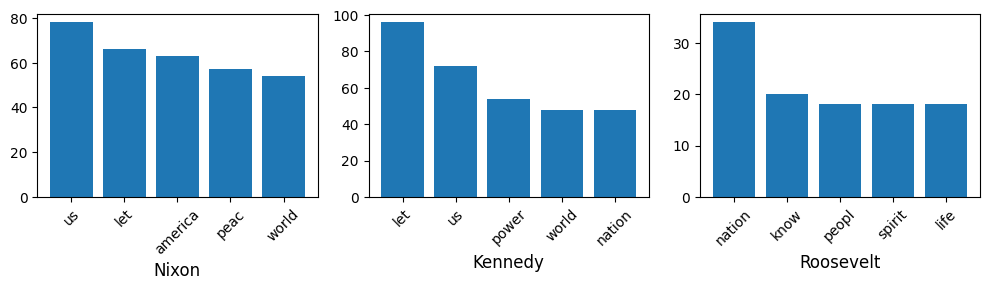

In [241]:
plt.figure(figsize=[10,3])

plt.subplot(131)
plt.bar(wordsN,frequenciesN)
plt.xlabel('Nixon', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
# plt.title('Top 10 Words for Nixon')

plt.subplot(132)
plt.bar(wordsK,frequenciesK)
plt.xlabel('Kennedy', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
# plt.title('Top 10 Words for Kennedy')

plt.subplot(133)
plt.bar(wordsR,frequenciesR)
plt.xlabel('Roosevelt', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
# plt.title('Top 10 Words for Roosevelt');

plt.tight_layout();


## Bigrams

In [242]:
Nixon_bigrams = list(ngrams(Nixon_stem,2))
Kennedy_bigrams = list(ngrams(Kennedy_stem,2))
Roosevelt_bigrams = list(ngrams(Roosevelt_stem,2))

In [243]:
Nixon_bigram_freq = nltk.FreqDist(Nixon_bigrams)
Kennedy_bigram_freq = nltk.FreqDist(Kennedy_bigrams)
Roosevelt_bigram_freq = nltk.FreqDist(Kennedy_bigrams)

In [244]:
common_bigrams_Nixon = Nixon_bigram_freq.most_common(5)
common_bigrams_Kennedy = Kennedy_bigram_freq.most_common(5)
common_bigrams_Roosevelt = Roosevelt_bigram_freq.most_common(5)

In [245]:
common_bigrams_Nixon_joined = []
common_bigrams_Kennedy_joined = []
common_bigrams_Roosevelt_joined = []

In [246]:
for bigram, freq in common_bigrams_Nixon:
    joined_ngram = ' '.join(bigram)
    common_bigrams_Nixon_joined.append([joined_ngram, freq])
    print(' '.join(bigram), ':', freq)

let us : 66
four year : 12
old polici : 12
peac world : 9
us resolv : 9


In [247]:
for bigram, freq in common_bigrams_Kennedy:
    joined_ngram = ' '.join(bigram)
    common_bigrams_Kennedy_joined.append([joined_ngram, freq])
    print(' '.join(bigram), ':', freq)

let us : 36
let side : 30
fellow citizen : 18
vice presid : 12
form human : 12


In [248]:
for bigram, freq in common_bigrams_Roosevelt:
    joined_ngram = ' '.join(bigram)
    common_bigrams_Roosevelt_joined.append([joined_ngram, freq])
    print(' '.join(bigram), ':', freq)

let us : 36
let side : 30
fellow citizen : 18
vice presid : 12
form human : 12


In [249]:
common_bigrams_Kennedy_joined

[['let us', 36],
 ['let side', 30],
 ['fellow citizen', 18],
 ['vice presid', 12],
 ['form human', 12]]

In [250]:
bigramsN, freqN = zip(*common_bigrams_Nixon_joined)
bigramsK, freqK = zip(*common_bigrams_Kennedy_joined)
bigramsR, freqR = zip(*common_bigrams_Roosevelt_joined)

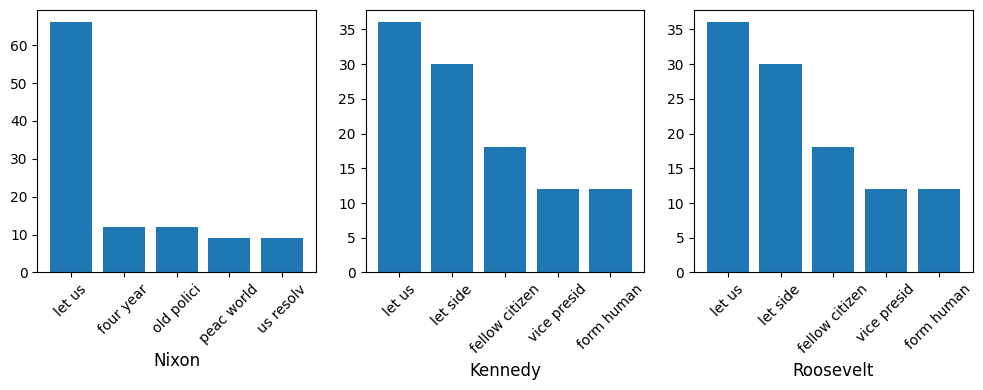

In [251]:
plt.figure(figsize=[10,4])

plt.subplot(131)
plt.bar(bigramsN,freqN)
plt.xlabel('Nixon', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.subplot(132)
plt.bar(bigramsK,freqK)
plt.xlabel('Kennedy', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.subplot(133)
plt.bar(bigramsR,freqR)
plt.xlabel('Roosevelt', fontsize=12)
plt.xticks(rotation=45, fontsize=10);

plt.tight_layout();

## Trigrams

In [252]:
Nixon_trigrams = list(ngrams(Nixon_stem,3))
Kennedy_trigrams = list(ngrams(Kennedy_stem,3))
Roosevelt_trigrams = list(ngrams(Roosevelt_stem,3))

In [253]:
Nixon_trigram_freq = nltk.FreqDist(Nixon_trigrams)
Kennedy_trigram_freq = nltk.FreqDist(Kennedy_trigrams)
Roosevelt_trigram_freq = nltk.FreqDist(Kennedy_trigrams)

In [254]:
common_trigrams_Nixon = Nixon_trigram_freq.most_common(5)
common_trigrams_Kennedy = Kennedy_trigram_freq.most_common(5)
common_trigrams_Roosevelt = Roosevelt_trigram_freq.most_common(5)

In [255]:
common_trigrams_Nixon_joined = []
common_trigrams_Kennedy_joined = []
common_trigrams_Roosevelt_joined = []

In [256]:
for trigram, freq in common_trigrams_Nixon:
    joined_ngram = ' '.join(trigram)
    common_trigrams_Nixon_joined.append([joined_ngram, freq])
    print(' '.join(trigram), ':', freq)

let us resolv : 9
world let us : 9
let us proud : 9
result new polici : 6
peac unless america : 6


In [257]:
for trigram, freq in common_trigrams_Kennedy:
    joined_ngram = ' '.join(trigram)
    common_trigrams_Kennedy_joined.append([joined_ngram, freq])
    print(' '.join(trigram), ':', freq)

let us begin : 12
let us never : 12
citizen world ask : 12
vice presid johnson : 6
presid johnson mr : 6


In [258]:
for trigram, freq in common_trigrams_Roosevelt:
    joined_ngram = ' '.join(trigram)
    common_trigrams_Roosevelt_joined.append([joined_ngram, freq])
    print(' '.join(trigram), ':', freq)

let us begin : 12
let us never : 12
citizen world ask : 12
vice presid johnson : 6
presid johnson mr : 6


In [259]:
trigramsN, freqN = zip(*common_trigrams_Nixon_joined)
trigramsK, freqK = zip(*common_trigrams_Kennedy_joined)
trigramsR, freqR = zip(*common_trigrams_Roosevelt_joined)

In [260]:
import matplotlib.ticker as ticker

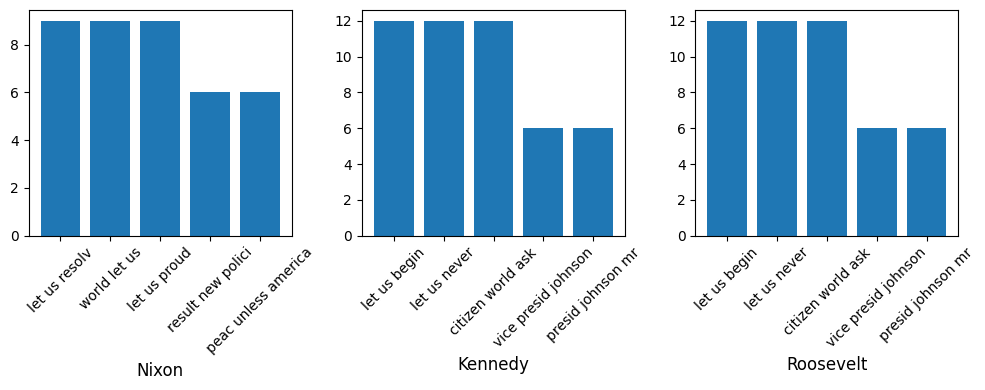

In [262]:
plt.figure(figsize=[10,4])

plt.subplot(131)
plt.bar(trigramsN,freqN)
plt.xlabel('Nixon', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))


plt.subplot(132)
plt.bar(trigramsK,freqK)
plt.xlabel('Kennedy', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))


plt.subplot(133)
plt.bar(trigramsR,freqR)
plt.xlabel('Roosevelt', fontsize=12)
plt.xticks(rotation=45, fontsize=10);

plt.tight_layout();

# Wordclouds

In [267]:
wc_corpus_Nixon = ' '.join(Nixon_clean)
wc_corpus_Kennedy = ' '.join(Kennedy_clean)
wc_corpus_Roosevelt = ' '.join(Roosevelt_clean)

In [266]:
from wordcloud import WordCloud

In [268]:
wc_Nixon = WordCloud(width = 5333, height=3000, background_color='black',
                     min_font_size=10, random_state=42).generate(wc_corpus_Nixon)

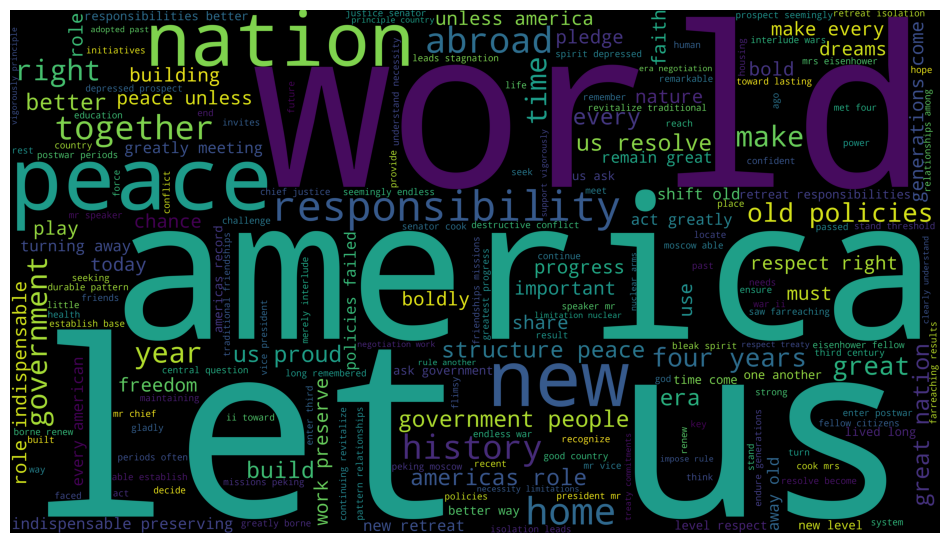

In [269]:
plt.figure(figsize=(12,7), facecolor=None)
plt.imshow(wc_Nixon)
plt.axis('off')
plt.xlabel('Word Cloud for Nixon');

In [270]:
wc_Kennedy = WordCloud(width = 5333, height=3000, background_color='black',
                     min_font_size=10, random_state=42).generate(wc_corpus_Kennedy)

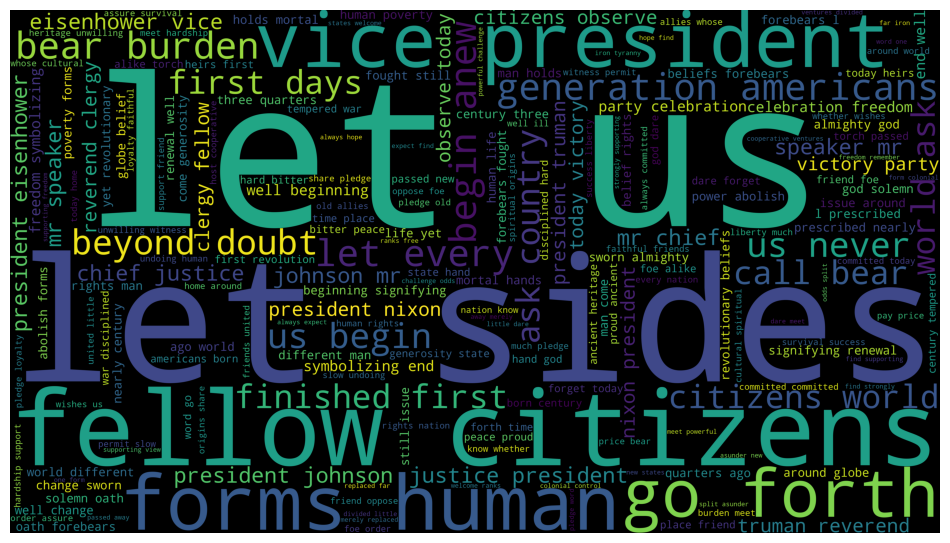

In [271]:
plt.figure(figsize=(12,7), facecolor=None)
plt.imshow(wc_Kennedy)
plt.axis('off')
plt.xlabel('Word Cloud for Kennedy');

In [273]:
wc_Roosevelt = WordCloud(width = 5333, height=3000, background_color='black',
                     min_font_size=10, random_state=42).generate(wc_corpus_Roosevelt)

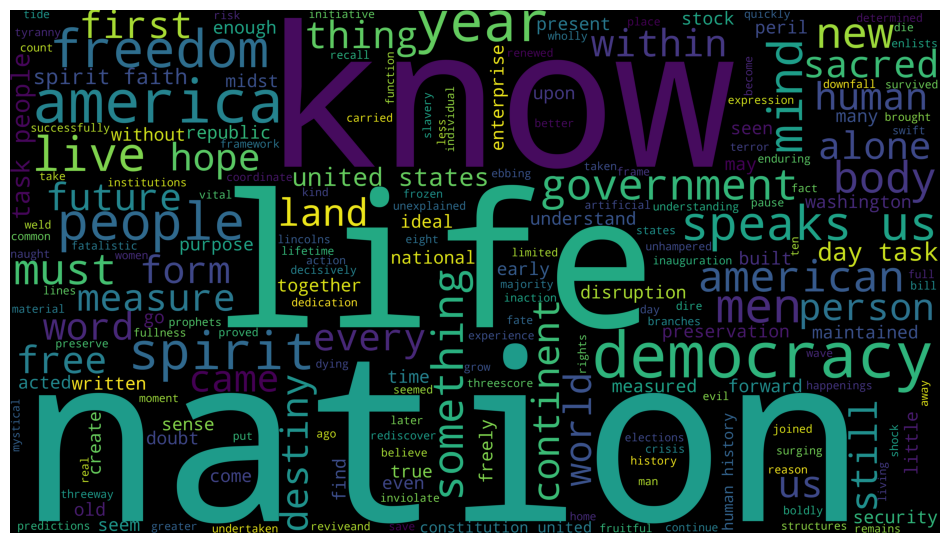

In [274]:
plt.figure(figsize=(12,7), facecolor=None)
plt.imshow(wc_Roosevelt)
plt.axis('off')
plt.xlabel('Word Cloud for Roosevelt');